In [1]:
!pip install imgaug==0.2.5
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from numpy import ones,vstack
from numpy.linalg import lstsq
from sympy import var, solveset

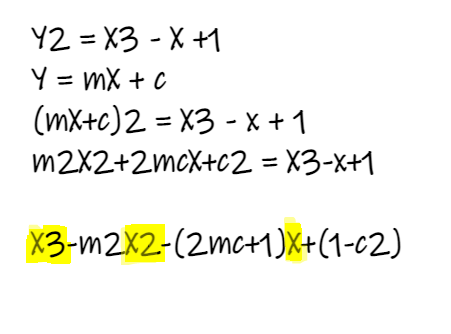

In [59]:
def solve_equations():
  points = [(x1_rand, y1_rand),(x2_rand, y2_rand)]
  x_coords, y_coords = zip(*points)
  A = vstack([x_coords,ones(len(x_coords))]).T
  m, c = lstsq(A, y_coords)[0]
  print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

  return m,c

In [199]:
def get_new_coordinates(x_coordiantes_of_intersection, Xs):
  for i in x_coordiantes_of_intersection:
    for j in Xs:
      if(round(i) != round(j)):        
        new_x = i
        new_y = (m*new_x) + c
        return new_x, new_y

Old Coordinates = (3, 5), (1, 1)
--> 0
3 5 1 1
Line Solution is y = 2.000000000000001x + -1.0000000000000004
New Coordinates(after mirroring around the x-axis) = (3, 5), (2.96059473233375E-16, 1.00000000000000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


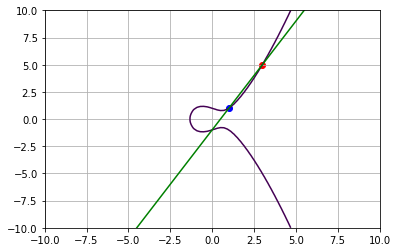

Old Coordinates = (3, 5), (2.9605947323337486e-16, 0.9999999999999999)
--> 1
3 5 2.9605947323337486e-16 0.9999999999999999
Line Solution is y = 1.333333333333334x + 1.0
New Coordinates(after mirroring around the x-axis) = (3, 5), (-1.22222222222222, 0.629629629629630)


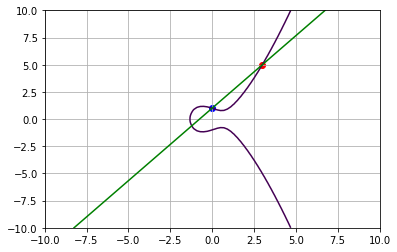

Old Coordinates = (3, 5), (-1.222222222222222, 0.6296296296296302)
--> 2
3 5 -1.222222222222222 0.6296296296296302
Line Solution is y = 1.0350877192982453x + 1.8947368421052633
New Coordinates(after mirroring around the x-axis) = (3, 5), (-1.22222222222222, -0.629629629629630)


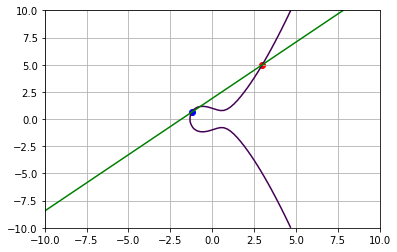

In [203]:
x1_rand, y1_rand = 0.0, 0.0
x2_rand, y2_rand = 0.0, 0.0
a = -1
b = 1
Xs = []
Ys = []

private_key_n = 3 # This should be kept secret (but we revealead it for the demonestration :) )

for i in range(private_key_n):
  y, x = np.ogrid[-10:10:100j, -10:10:100j]
  plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0]) # The equation  
  plt.grid()
  
  while(i == 0 and y1_rand**2 != (x1_rand**3 + a*x1_rand + b)):
    x1_rand = random.randrange(0, 10)
    y1_rand = random.randrange(0, 10)
  while(i == 0 and y2_rand**2 != (x2_rand**3 + a*x2_rand + b)):
    x2_rand = random.randrange(0, 10)
    y2_rand = random.randrange(0, 10)

  print("Old Coordinates = ({x1_rand}, {y1_rand}), ({x2_rand}, {y2_rand})".format(x1_rand=x1_rand, y1_rand=y1_rand, x2_rand=x2_rand, y2_rand=y2_rand))
  Xs.append(x1_rand)
  Xs.append(x2_rand)
  Ys.append(y1_rand)
  Ys.append(y2_rand)

  plt.scatter(x1_rand, y1_rand, color='red')
  plt.scatter(x2_rand, y2_rand, color='blue')
  if(not(x1_rand == x2_rand and y1_rand == y2_rand)):
    print(str("--> ") + str(i))
    print(x1_rand, y1_rand, x2_rand, y2_rand)

    plt.axline((x1_rand, y1_rand), (x2_rand, y2_rand), color='green')
  
  m, c = solve_equations()
  x = var('x', real=True)
  x_coordiantes_of_intersection = solveset(x**3 - m**2*x**2 - (2*m*c+1)*x + (1-c**2), x) # The x-coordinates of the points of the intersection

  new_x, new_y = get_new_coordinates(x_coordiantes_of_intersection, Xs)
  new_y = new_y * -1
  x2_rand, y2_rand = float(new_x), float(new_y)
  
  print("New Coordinates(after mirroring around the x-axis) = ({x1_rand}, {y1_rand}), ({new_x}, {new_y})".format(x1_rand=x1_rand, y1_rand=y1_rand, new_x=new_x, new_y=new_y)) # The new coordinates of the intersection
  Xs = []
  Ys = []

  plt.show()
  plt.pause(0.001)
